
**Team:** <br>Ceyda Akbulut<br>Hyosang Kim<br>Raniyaharini Rajendran

# **●Understanding the Dataset** <br>
Dataset name: Adult dataset<br>
Dataset characteristics: Multivariate<br>
Attribute characteristics: Categorical, Integer<br>
Number of Instances(Total): 48842<br>
Number of Instances(Train):32561<br>
Number of Instances(Test):16281<br>
Number of Attributes:14


**Download Adult Dataset from UCI Machine Learning Repository**

In [ ]:
%%capture
%%bash
pip install imbalanced-learn

In [ ]:
#Read the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
#Read adult.data as df (training part)
df_train = pd.read_csv('adult.data', header=None)

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
#Read adult.data as df (testing part)
df_test = pd.read_csv('adult.test', error_bad_lines=False)
pd.set_option("display.max_columns", None)
#print(df_test.head(20))

In [ ]:
#Show all columns to rename them
pd.set_option("display.max_columns", None)
#print(df_train.head(20))

In [ ]:
#Read adult.names to understand dataset description
my_file = open("adult.names", "r")
content = my_file.read()
#print(content)

In [ ]:
#Read old.adult.names files
my_file_old = open("old.adult.names", "r")
content_old = my_file_old.read()
#print(content_old)

In [ ]:
#Generate column names manually and print df2_train again
names=[ 'age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital loss','hours-per-week','native-country','result']
df2_train = pd.read_csv('adult.data', names = names)
#print(df2_train.head(20))

In [ ]:
#Generate column names manually and print df2_test again
names=[ 'age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital loss','hours-per-week','native-country','result']
df2_test = pd.read_csv('adult.test', names = names)
#print(df2_train.head(20))

In [ ]:
main_data = pd.concat([df2_test.assign(ind="df2_test"), df2_train.assign(ind="df2_train")])
#!!!!!To separate thema again: test, train = df[df["ind"].eq("df2_test")], df[df["ind"].eq("df2_train")]
#print(main_data.shape)
#print(main_data.head(20))
#print(main_data.tail(20))
#Note: First row is not useful. Therefore, we will remove it.

In [ ]:
#Delete the first row since it has no meaning
main_data.drop(index=main_data.index[0],axis=0,inplace=True)
#We executed the code line above. So, we can show it as a comment.
#print(main_data.shape)
#print(main_data.head(20))

In [ ]:
main_data=main_data.iloc[:, : 14]

In [ ]:
print(main_data.head(5))

  age   workclass    fnlwgt      education  education-num  \
1  25     Private  226802.0           11th            7.0   
2  38     Private   89814.0        HS-grad            9.0   
3  28   Local-gov  336951.0     Assoc-acdm           12.0   
4  44     Private  160323.0   Some-college           10.0   
5  18           ?  103497.0   Some-college           10.0   

        marital-status          occupation relationship    race      sex  \
1        Never-married   Machine-op-inspct    Own-child   Black     Male   
2   Married-civ-spouse     Farming-fishing      Husband   White     Male   
3   Married-civ-spouse     Protective-serv      Husband   White     Male   
4   Married-civ-spouse   Machine-op-inspct      Husband   Black     Male   
5        Never-married                   ?    Own-child   White   Female   

   capital-gain  capital loss  hours-per-week  native-country  
1           0.0           0.0            40.0   United-States  
2           0.0           0.0            50.0   

In [ ]:
main_data.shape

(48841, 14)

# ● **Data preprocessing/Cleaning** <br>
■ Data integration:

*  Integration of multiple databases, data warehouses, or files (entity identification, value resolution)

■ Data cleaning:<br>

*   Fill in missing values
*   Smooth noisy data
*   Identify or remove outliers
*   Resolve inconsistencies

■ Data reduction:<br>

*   Duplicate elimination

# 3.1 Exploratory data analysis

# ● Univariate analysis <br>
○ Plot the value of each feature (boxplot, histogram, etc.). What do you
observe? <br>
○ Check for class imbalance. If existing, what are its effects? How can
you cope with it?<br>


Univariate analysis is perhaps the simplest form of statistical analysis. Like other forms of statistics, it can be inferential or descriptive. The key fact is that only one variable is involved.<br>*(https://en.wikipedia.org/wiki/Univariate_analysis)*<br>

**Continuous Variables:** In case of continuous variables, we need to understand the central tendency and spread of the variables.These are measured using various statistical metrics visualization methods as shown below: <br>

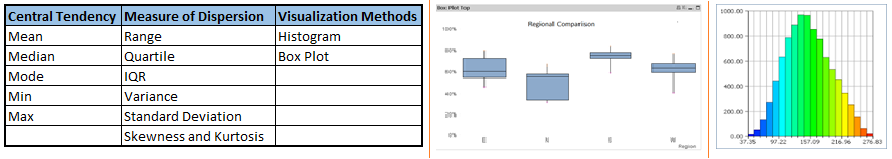<br>

**Categorical Variables:** For categorical variables, we’ll use frequency table to understand distribution of each category.<br>
*(https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/)*



In [ ]:
#Missing data can occur when no information is provided for one or more items or for a whole unit. Missing data is a very big problem in a real-life scenarios.
#Check if there is any missing value with isna() function and sum to count the NaN values
main_data.isna().sum()
#As a result, there is no missing value result.But without NaN value, we have '?' in our dataset.

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital loss      0
hours-per-week    0
native-country    0
dtype: int64

If we handle missing values of categorical variables, there are 4 main steps as below.


1.   Ignore observation.
2.   **Replace by most frequent value (Mode).**
3.   Develop a model to predict missing values.
4.   Treat missing data as just another category.

We will choose **second option** for our dataset.




In [ ]:
#To see the frequency list of each column to understand which columns include '?' as a value.
main_data.loc[main_data['native-country'].str.contains('\?')].head(10)
#main_data['age'].value_counts()
#main_data['workclass'].value_counts()
#main_data['fnlwgt'].value_counts()
#main_data['education'].value_counts()
#main_data['education-num'].value_counts()
#main_data['occupation'].value_counts()
#main_data['relationship'].value_counts()
#main_data['race'].value_counts()
#main_data['sex'].value_counts()
#main_data['capital-gain'].value_counts()
#main_data['capital loss'].value_counts()
#main_data['hours-per-week'].value_counts()
#main_data['native-country'].value_counts()
#main_data['result'].value_counts()



,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital loss,hours-per-week,native-country
20,40,Private,85019.0,Doctorate,16.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0.0,0.0,45.0,?
66,41,Private,109912.0,Bachelors,13.0,Never-married,Other-service,Not-in-family,White,Female,0.0,0.0,40.0,?
84,44,Self-emp-inc,223881.0,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,99999.0,0.0,50.0,?
189,34,State-gov,513100.0,Bachelors,13.0,Married-spouse-absent,Farming-fishing,Not-in-family,Black,Male,0.0,0.0,40.0,?
254,42,Federal-gov,177937.0,Bachelors,13.0,Never-married,Prof-specialty,Not-in-family,White,Male,0.0,0.0,40.0,?
306,37,Local-gov,263690.0,Bachelors,13.0,Never-married,Prof-specialty,Unmarried,Black,Male,0.0,0.0,40.0,?
330,64,Self-emp-not-inc,71807.0,Doctorate,16.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024.0,0.0,50.0,?
404,27,Private,500068.0,HS-grad,9.0,Married-civ-spouse,Other-service,Husband,White,Male,0.0,0.0,36.0,?
421,65,Private,88145.0,1st-4th,2.0,Married-civ-spouse,Handlers-cleaners,Husband,Other,Male,0.0,0.0,40.0,?
472,28,State-gov,293628.0,Masters,14.0,Divorced,Prof-specialty,Not-in-family,White,Male,0.0,0.0,10.0,?


The column list has '?' as a value. We can see them with the help of the frequency table.



1.   workclass
2.   occupation
3.   native-country






In [ ]:
#Let's start with 'workclass'
main_data['workclass'].value_counts()
#Mode is 'Private' for this column. We will replace ? to Private as we agreed above.

 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
 State-gov            1980
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64

In [ ]:
#Replace '?' to ''Private'.
main_data['workclass'].loc[main_data['workclass'].str.contains('\?')]=' Private'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
#Check frequency table again to be sure if there is '?', or not.
main_data['workclass'].value_counts()

 Private             36705
 Self-emp-not-inc     3862
 Local-gov            3136
 State-gov            1980
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64

In [ ]:
#Now,we will continue with 'occupation'.
main_data['occupation'].value_counts()
#Mode is 'Prof-specialty' for this column.

 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5610
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
 ?                    2809
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: occupation, dtype: int64

In [ ]:
#Replace '?' to 'Prof-specialty'
main_data['occupation'].loc[main_data['occupation'].str.contains('\?')]=' Prof-specialty'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
#Check frequency table again to be sure if there is '?', or not.
main_data['occupation'].value_counts()

 Prof-specialty       8981
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5610
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: occupation, dtype: int64

In [ ]:
#Now,we will continue with 'native-country'.
main_data['native-country'].value_counts()
#Mode is 'United-States' for this column.

 United-States                 43831
 Mexico                          951
 ?                               857
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Guatemala                        88
 Poland                           87
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Greece                           49
 Nicaragua                        49
 

In [ ]:
#Replace '?' to 'United-States'
main_data['native-country'].loc[main_data['native-country'].str.contains('\?')]=' United-States'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
#Check frequency table again to be sure if there is '?', or not.
main_data['native-country'].value_counts()

 United-States                 44688
 Mexico                          951
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Guatemala                        88
 Poland                           87
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Greece                           49
 Nicaragua                        49
 Peru                             46
 

In [ ]:
#main_data['occupation'].value_counts()
#main_data['native-country'].value_counts()
#main_data['workclass'].value_counts()
#main_data['age'].value_counts()
#main_data['race'].value_counts()
main_data['education'].value_counts()
#main_data['relationship'].value_counts()

 HS-grad         15784
 Some-college    10878
 Bachelors        8024
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: education, dtype: int64

In [ ]:
#Check main_data again.
print(main_data.shape)
print(main_data.head(10))

(48841, 14)
   age          workclass    fnlwgt      education  education-num  \
1   25            Private  226802.0           11th            7.0   
2   38            Private   89814.0        HS-grad            9.0   
3   28          Local-gov  336951.0     Assoc-acdm           12.0   
4   44            Private  160323.0   Some-college           10.0   
5   18            Private  103497.0   Some-college           10.0   
6   34            Private  198693.0           10th            6.0   
7   29            Private  227026.0        HS-grad            9.0   
8   63   Self-emp-not-inc  104626.0    Prof-school           15.0   
9   24            Private  369667.0   Some-college           10.0   
10  55            Private  104996.0        7th-8th            4.0   

         marital-status          occupation    relationship    race      sex  \
1         Never-married   Machine-op-inspct       Own-child   Black     Male   
2    Married-civ-spouse     Farming-fishing         Husband   White 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2133e99390>,
      dtype=object)

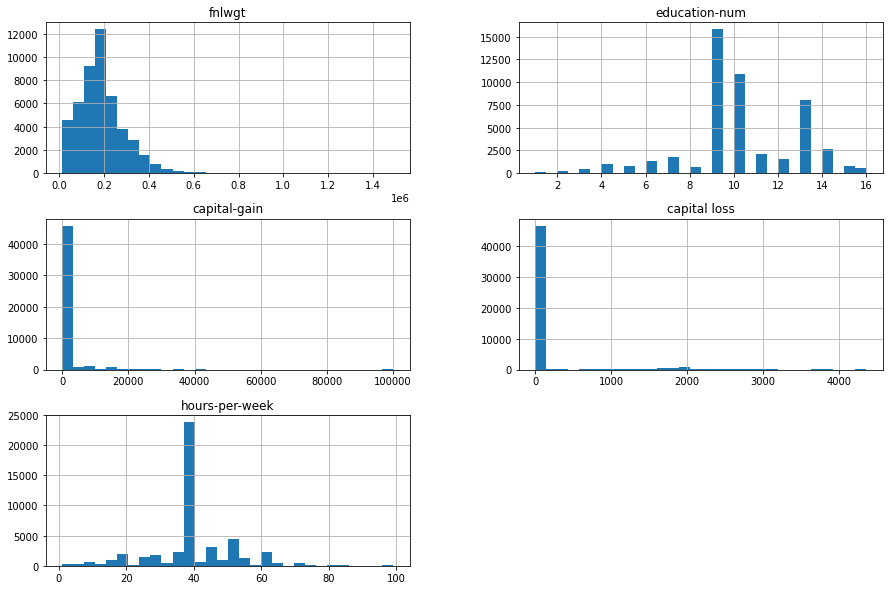

In [ ]:
#Plot a histogram for each numerical attribute in the main_data
main_data.hist(bins=30, figsize=(15, 10))

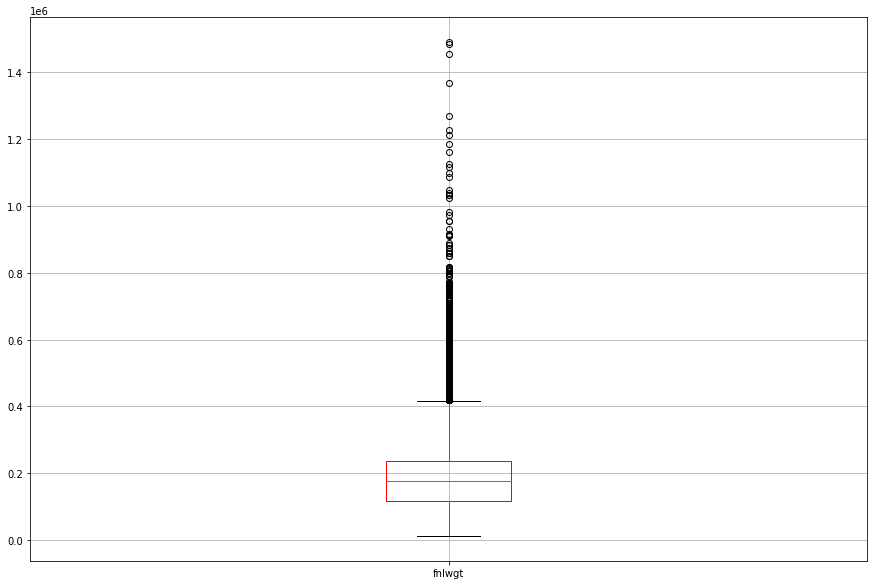

In [ ]:
#Plot a boxplot for each numerical attribute in the main_data.
#Boxplot for 'fnlwgt'.
boxplot = main_data.boxplot(column=['fnlwgt'],figsize=(15, 10),boxprops=dict(color='red'))

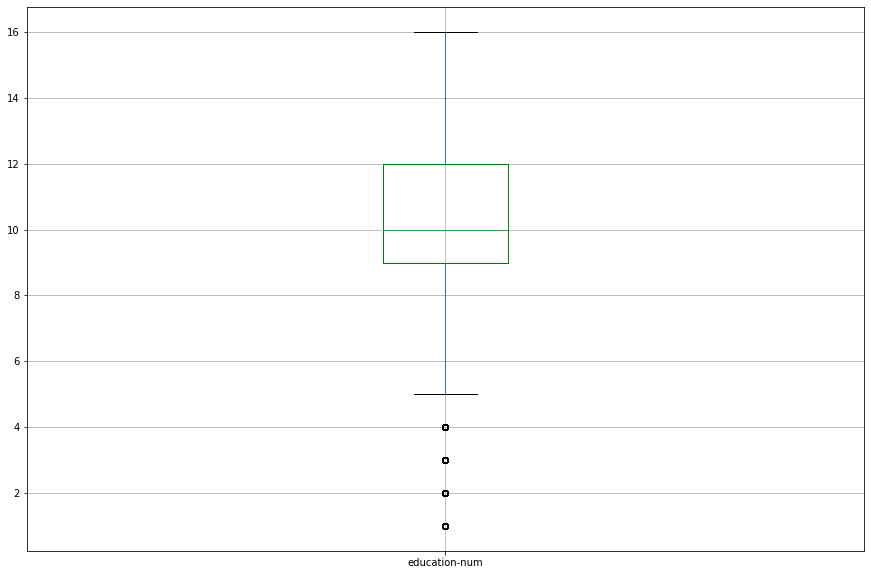

In [ ]:
#Boxplot for 'education-num'.
boxplot = main_data.boxplot(column=['education-num'],figsize=(15, 10),boxprops=dict(color='green'))

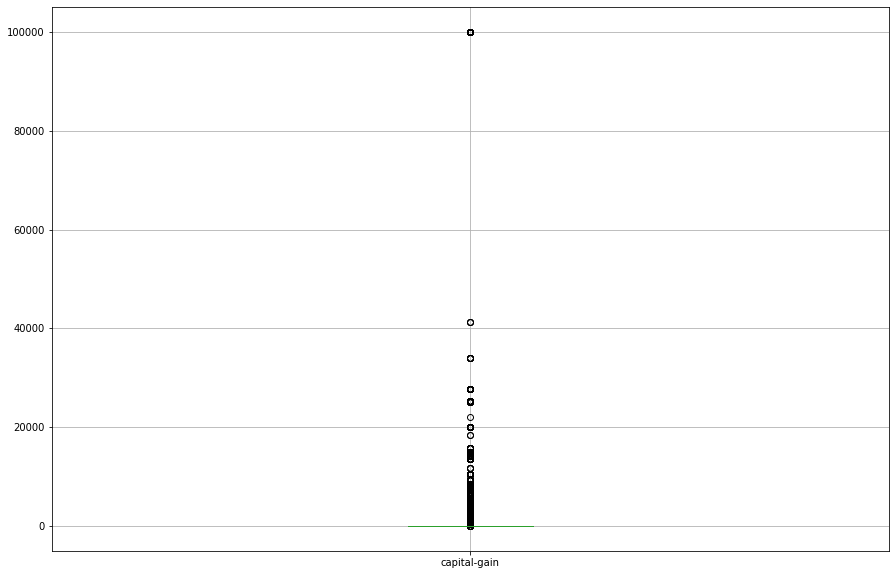

In [ ]:
#Boxplot for 'capital-gain'.
boxplot = main_data.boxplot(column=['capital-gain'],figsize=(15, 10),boxprops=dict(color='blue'))

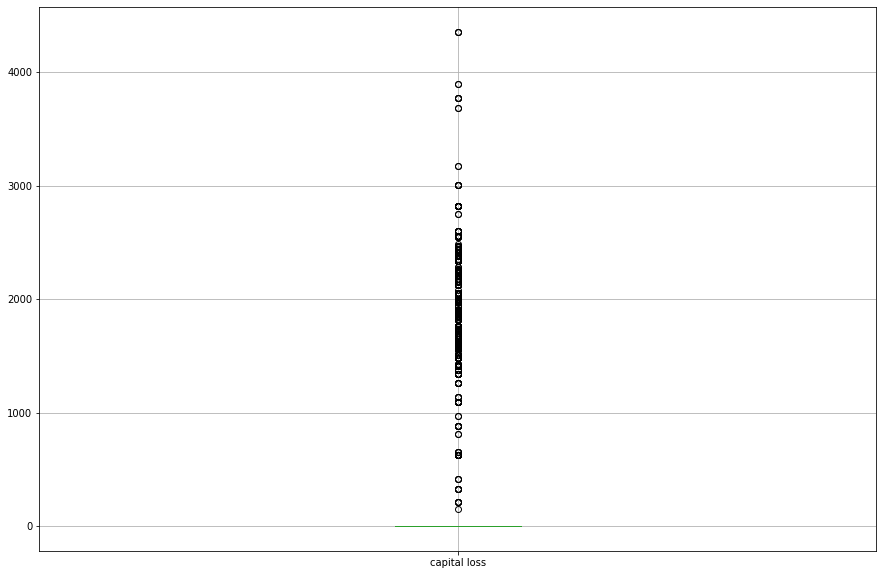

In [ ]:
#Boxplot for 'capital loss'.
boxplot = main_data.boxplot(column=['capital loss'],figsize=(15, 10),boxprops=dict(color='red'))

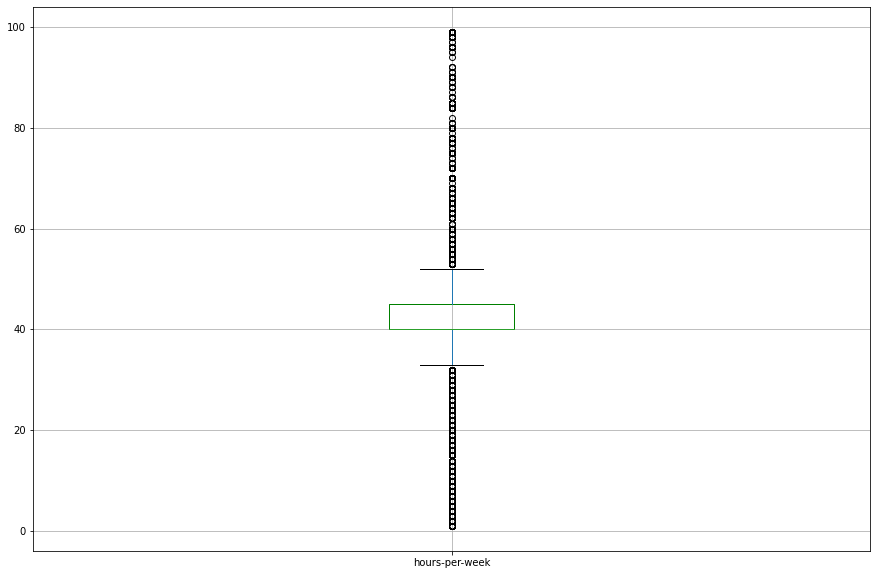

In [ ]:
#Boxplot for 'hours-per-week'.
boxplot = main_data.boxplot(column=['hours-per-week'],figsize=(15, 10),boxprops=dict(color='green'))

# **Four Outlier Detection Techniques**

1.   **Numeric Outlier**<br>
This is the simplest, nonparametric outlier detection method in a one dimensional feature space. Here outliers are calculated by means of the IQR (InterQuartile Range).The first and the third quartile (Q1, Q3) are calculated. An outlier is then a data point x_i that lies outside the interquartile range. Using the interquartile multiplier value k=1, the range limits are the typical upper and lower whiskers of a box plot.

2.   Z-Score
3.   DBSCAN
4.   Isolation Forest

For our dataset, we will interpret boxplots & histograms and apply the first one, Numeric Outlier.




In [ ]:
#Write a function to calculate IOR for each numerical attribute and show skewness
def detection_outlier(dfcolumn):
#Calculate Q1, Q3 and IQR
 Q1 = dfcolumn.quantile(0.25)
 Q3 = dfcolumn.quantile(0.75)
 IQR = Q3-Q1 #Interquartile range
#In general, constant should be 1.
 lower  = Q1-1*IQR
 higher = Q3+1*IQR
#Find number of outliers for specific column
 print('Before data preprocessing:')
 print('Skewness:',dfcolumn.skew())
 print(dfcolumn.describe())
 dfcolumn.loc[(dfcolumn> higher) | (dfcolumn< lower)]=dfcolumn.mean()
 print('After replacing outliers by mean:')
 print('Skewness:',dfcolumn.skew())
 print('Median:',dfcolumn.median())
 print('IQR value:',IQR)
 print('Lower,Higher:',lower,',',higher)
 return

# **How to handle Outliers?**


1.   Set up a filter in your testing tool.
2.   Remove or change outliers during post-test analysis.
3.  **Change the value of outliers.**
4.   Consider the underlying distribution
5.   Consider the value of mild outliers.


To remove outliers, we will change the value of outliers. Deleting observations is not logical because of amount of the outliers. We also don't know if these are natural outliers or artificials. <br>
**Note1:** If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed.<br>
**Sub-result1:** Replacing the values of outliers with median was not effective(Tried).<br>
**Sub-result2:** As a second method, we tried to remove outliers from our dataframe by IQR method. It was not efficient.<br>
**Sub-result3:** Log transformation was also not effective for outliers.<br>
**Sub-result4:** Z-score was also not effective for outliers.<br>
**Result:** We found the outliers with the help of IOR method(numeric values) and changed the values of outliers by mean for each column.


In [ ]:
detection_outlier(main_data['fnlwgt'])

Before data preprocessing:
Skewness: 1.4388862793258443
count    4.884100e+04
mean     1.896664e+05
std      1.056039e+05
min      1.228500e+04
25%      1.175550e+05
50%      1.781470e+05
75%      2.376460e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64
After replacing outliers by mean:
Skewness: 0.15564508961150672
Median: 178147.0
IQR value: 120091.0
Lower,Higher: -2536.0 , 357737.0


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
detection_outlier(main_data['capital-gain'])

Before data preprocessing:
Skewness: 11.894554083731773
count    48841.000000
mean      1079.045208
std       7452.093700
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64
After replacing outliers by mean:
Skewness: 3.032809452291708
Median: 0.0
IQR value: 0.0
Lower,Higher: 0.0 , 0.0


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
detection_outlier(main_data['capital loss'])

Before data preprocessing:
Skewness: 4.569755567864217
count    48841.000000
mean        87.504105
std        403.008483
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital loss, dtype: float64
After replacing outliers by mean:
Skewness: 4.2956796240515205
Median: 0.0
IQR value: 0.0
Lower,Higher: 0.0 , 0.0


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
detection_outlier(main_data['hours-per-week'])

Before data preprocessing:
Skewness: 0.2387451287751267
count    48841.000000
mean        40.422391
std         12.391571
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64
After replacing outliers by mean:
Skewness: 1.470243153320307
Median: 40.0
IQR value: 5.0
Lower,Higher: 35.0 , 50.0


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
detection_outlier(main_data['education-num'])

Before data preprocessing:
Skewness: -0.3164944195509983
count    48841.000000
mean        10.078029
std          2.570965
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64
After replacing outliers by mean:
Skewness: 0.3819504898778172
Median: 10.0
IQR value: 3.0
Lower,Higher: 6.0 , 15.0


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
#Find duplicates in dataframe
duplicate = main_data[main_data.duplicated()]
pd.set_option("display.max_rows", None)
print("Duplicate Rows :")
duplicate.head(10)

Duplicate Rows :


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital loss,hours-per-week,native-country
865,24,Private,194630.000000,Bachelors,13.0,Never-married,Prof-specialty,Not-in-family,White,Male,0.0,0.0,35.000000,United-States
3234,18,Private,161245.000000,11th,7.0,Never-married,Other-service,Own-child,White,Male,0.0,0.0,40.422391,United-States
6051,21,Private,189666.430786,Some-college,10.0,Never-married,Prof-specialty,Own-child,White,Female,0.0,0.0,40.000000,United-States
9487,23,Private,189666.430786,Bachelors,13.0,Never-married,Exec-managerial,Not-in-family,White,Male,0.0,0.0,40.422391,United-States
9820,20,Private,189666.430786,Some-college,10.0,Never-married,Other-service,Own-child,White,Female,0.0,0.0,40.422391,United-States
10232,39,Private,189666.430786,HS-grad,9.0,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,40.000000,United-States
10625,22,Private,189666.430786,Some-college,10.0,Never-married,Craft-repair,Own-child,White,Male,0.0,0.0,40.000000,United-States
11190,37,Private,52870.000000,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.000000,United-States
11213,29,Private,36440.000000,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Female,0.0,0.0,40.000000,United-States
12176,18,Private,189666.430786,Some-college,10.0,Never-married,Adm-clerical,Not-in-family,White,Female,0.0,0.0,40.000000,United-States


In [ ]:
#Drop dublicates
main_data.drop_duplicates()
#print(main_data.head(10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f213346d950>,
      dtype=object)

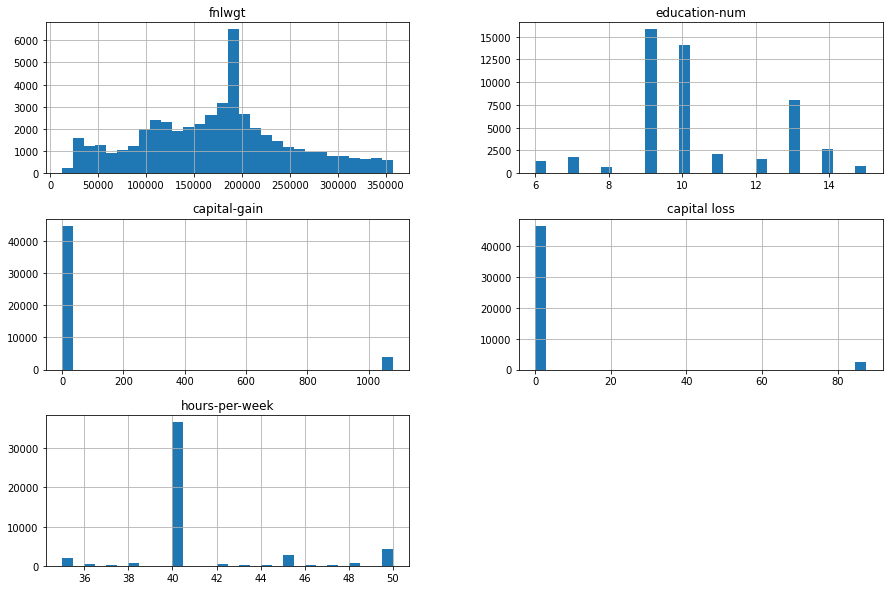

In [ ]:
#boxplot = main_data.boxplot(column=['fnlwgt'],figsize=(15, 10),boxprops=dict(color='red'))
#boxplot = main_data.boxplot(column=['capital-gain'],figsize=(15, 10),boxprops=dict(color='blue'))
#boxplot = main_data.boxplot(column=['capital loss'],figsize=(15, 10),boxprops=dict(color='red'))
#boxplot = main_data.boxplot(column=['education-num'],figsize=(15, 10),boxprops=dict(color='red'))
#boxplot = main_data.boxplot(column=['hours-per-week'],figsize=(15, 10),boxprops=dict(color='green'))
main_data.hist(bins=30, figsize=(15, 10))

# ● Bivariate analysis / Checking for correlations <br>
**Note**: Bivariate analysis is one of the simplest forms of quantitative (statistical) analysis. It involves the analysis of two variables (often denoted as X, Y), for the purpose of determining the empirical relationship between them. <br>
*(https://en.wikipedia.org/wiki/Bivariate_analysis)* <br>

Correlation varies between -1 and +1.

*   -1: perfect negative linear correlation
*   +1:perfect positive linear correlation
*   No correlation

Correlation can be derived using following formula:


*   **Correlation = Covariance(X,Y) / SQRT( Var(X)* Var(Y))**





Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.

In [ ]:
categorical_main_data=main_data[['workclass','education','marital-status','occupation','relationship','race','sex','native-country']]
numerical_main_data=main_data[['fnlwgt','capital-gain','capital loss','hours-per-week']]
numerical_main_data['age']=pd.to_numeric(main_data['age'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


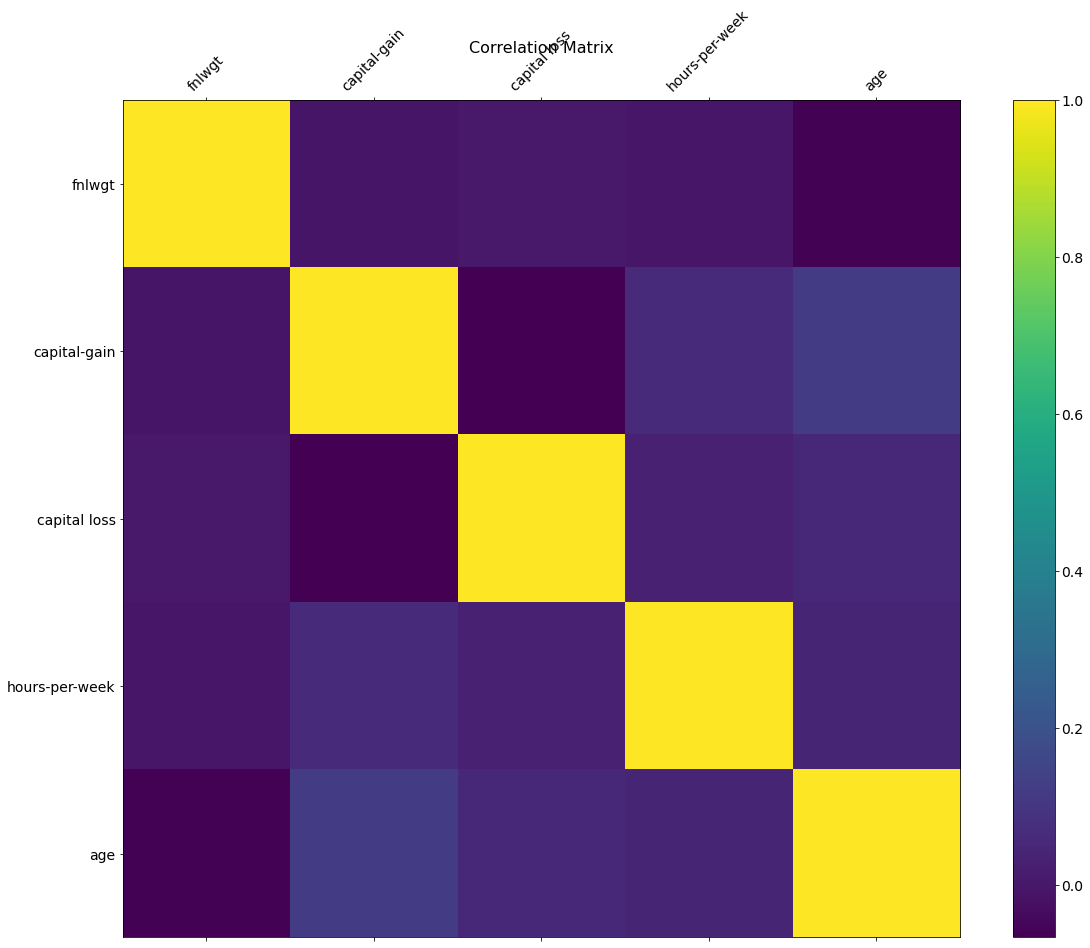

In [ ]:
#Correlation matrix with colorful indicators
f = plt.figure(figsize=(19, 15))
plt.matshow(numerical_main_data.corr(), fignum=f.number)
plt.xticks(range(numerical_main_data.select_dtypes(['number']).shape[1]), numerical_main_data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(numerical_main_data.select_dtypes(['number']).shape[1]), numerical_main_data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:
#Correlation matrix with colorful indicators and corr. numbers
corr = numerical_main_data.corr()
corr.style.background_gradient(cmap='coolwarm')

,fnlwgt,capital-gain,capital loss,hours-per-week,age
fnlwgt,1.000000,-0.004473,0.004821,-0.003365,-0.059846
capital-gain,-0.004473,1.000000,-0.066428,0.060826,0.119828
capital loss,0.004821,-0.066428,1.000000,0.033277,0.050893
hours-per-week,-0.003365,0.060826,0.033277,1.000000,0.043933
age,-0.059846,0.119828,0.050893,0.043933,1.000000


In [ ]:
#print(main_data.head(10))

In [ ]:
from scipy.stats import chi2_contingency

contigency= pd.crosstab(categorical_main_data['workclass'], categorical_main_data['occupation'])
contigency_pct = pd.crosstab(categorical_main_data['workclass'], categorical_main_data['occupation'], normalize='index')

plt.figure(figsize=(12,8))
sns.heatmap(contigency, annot=True, cmap="YlGnBu")

c, p, dof, expected = chi2_contingency(contigency)
print('Chi2: \n',c)
print('The p-value of the test:\n',p)

# FAMD - DBSCAN
### DBSCAN

Why does it suit our dataset?
    
Choosing the clustering methods
1.	(Partitioning Clustering)K-means, K-medoids: As K-means are used above, it would be effective to use the one with different type of clustering.  
2.	(Hierarchical Clustering) Agglomerative, DIANA: Inefficient for large datasets.
3.	(Density Clustering) DBSCAN:
     -	Pros: resistant to noise and handle clusters of different shapes and sizes.
     -	Cons: However, it fails to identify clusters of varying densities. Also, it has the problem in high-dimensional data due to the curse of dimensionality.
     But our dataset does not have high-dimensionality since the number of observation is bigger than the number of features.

FAMD library:

https://www.tomasbeuzen.com/post/clustering-mixed-data/

FAMD Explanation - Documenting

https://towardsdatascience.com/factor-analysis-of-mixed-data-5ad5ce98663c


In [ ]:
# Install Package - Prince

my_path = '/content/drive/MyDrive/additional_package'

!pip install --target=$my_path Prince


# Use Package

import sys
sys.path.append('/content/drive/MyDrive/additional_package')

     |████████████████████████████████| 11.2 MB 6.6 MB/s 
     |████████████████████████████████| 15.7 MB 54.5 MB/s 
     |████████████████████████████████| 24.8 MB 1.4 MB/s 
     |████████████████████████████████| 11.3 MB 63.0 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 890 kB 79.8 MB/s 
     |████████████████████████████████| 97 kB 10.0 MB/s 
     |████████████████████████████████| 4.3 MB 62.9 MB/s 
     |████████████████████████████████| 1.1 MB 69.6 MB/s 
     |████████████████████████████████| 247 kB 77.5 MB/s 
     |████████████████████████████████| 40 kB 7.4 MB/s 
     |████████████████████████████████| 503 kB 67.3 MB/s 
     |████████████████████████████████| 306 kB 72.7 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1

In [ ]:
import numpy as np
import pandas as pd
from prince import FAMD
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [ ]:
# Previous codes.
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import LabelEncoder

df_train = pd.read_csv('adult.data', header=None)
df_test = pd.read_csv('adult.test', error_bad_lines=False)
pd.set_option("display.max_columns", None)
my_file = open("adult.names", "r")
content = my_file.read()
my_file_old = open("old.adult.names", "r")
content_old = my_file_old.read()
names=[ 'age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital loss','hours-per-week','native-country','result']
df2_train = pd.read_csv('adult.data', names = names)

names=[ 'age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital loss','hours-per-week','native-country','result']
df2_test = pd.read_csv('adult.test', names = names)

main_data = pd.concat([df2_test.assign(ind="df2_test"), df2_train.assign(ind="df2_train")])
main_data.drop(index=main_data.index[0],axis=0,inplace=True)
main_data['workclass'].loc[main_data['workclass'].str.contains('\?')]=' Private'
main_data['occupation'].loc[main_data['occupation'].str.contains('\?')]=' Prof-specialty'
main_data['native-country'].loc[main_data['native-country'].str.contains('\?')]=' United-States'

duplicate = main_data[main_data.duplicated()]
pd.set_option("display.max_rows", None)
main_data.drop_duplicates()

test, train = main_data[main_data["ind"].eq("df2_test")], main_data[main_data["ind"].eq("df2_train")]
X = train.loc[:, ['age', 'fnlwgt', 'capital-gain', 'capital loss', 'hours-per-week', 'education', 'workclass', 'marital-status', 'race', 'sex', 'native-country']]
y= train.iloc[:, 14]
y = np.array([0 if l == " <=50K" else 1 for l in y])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


### FAMD Parameter tuning

* n_components: the number of components
> To calculate the number of principal components used for FAMD, we fit the model with different parameters and observe the explained inertia by the number of components on the graph. Here we found that it should be very high value for 90% of variance to be explained.

* n_iter: the number of iterations used for computing SVD
> We did not change the default n_iter since we already have high n_components and increasing the number of iterations would worsen the time complexity.





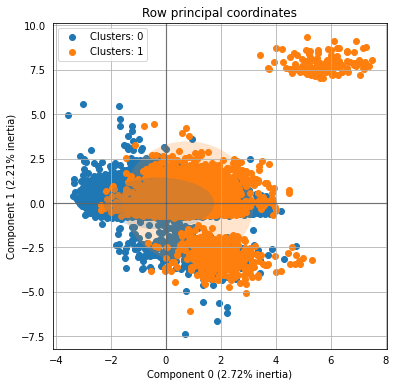

In [ ]:
# Factor Analysis for Mixed Data type

# Fit - Learn from the dataset
# The reason behind the high n_components is explained in the next cell run results.
famd = FAMD(n_components = 130, random_state = 101).fit(X_train)

# Transform - Convert the X_train data with n_components of table.
famdX = famd.transform(X_train)

# Visualization of the projected variables on the two major principal components graph
ax = famd.plot_row_coordinates(
     X_train,
     ax=None,
     figsize=(6, 6),
     x_component=0,
     y_component=1,
     labels=None,
     color_labels=['Clusters: {}'.format(t) for t in y_train],
     ellipse_outline=False,
     ellipse_fill=True,
     show_points=True
 )

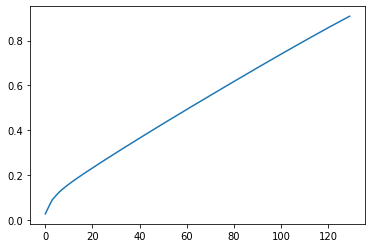

In [ ]:
# Choosing the number of components.
# We can see that at least 130 components are needed to reach 0.9 of the total distribution

plt.plot(np.cumsum(famd.explained_inertia_))

**3.2 Clustering:**
**Kmeans Clustering :**
The k-means clustering method is an unsupervised ML technique used to identify clusters of data objects for a dataset.

>**Parameter Tuning**
The hyper-parameters for k-means clustering as given by Sklearn are:
n_clusters, init,n_init, max_iter, tol, verbose, random_state, copy_x, algorithm


*   n_clusters - 3 The optimal number of clusters to be formed
*   init - k-means++ selects initial cluster centres for kmeans clustering to speed up convergence
*   max_iter - The number of times the algorithm will run for different centroid seeds(default=10)
*   tol - Maximum iterations in a single run(default = 300)
*   verbose - default=0
*   random_state - Centroid initialization for random numbers (Here it is decalred as none)
*   copy_x - Typically used inorder to centre the data (Here it is true)
*   algorithm - Default=auto (for backward compatability)

> **Evaluation measures**
Here, we have used two measure to evaluate the model performance:

*   Intrinsic measures - Silhouette Score, Calinski Harabasz Score
*   Extrinsic measures - Homogeneity Score, V measure Score






0

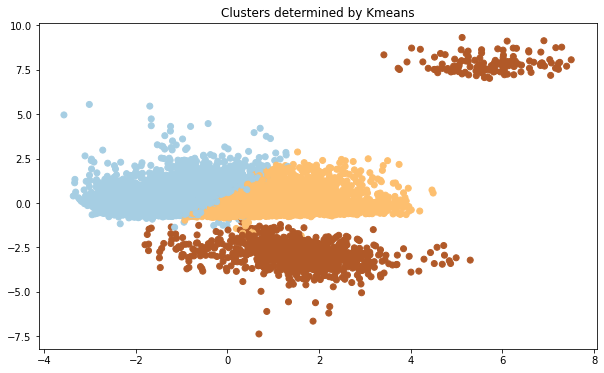

In [ ]:
# Kmeans Clustering

## Parameter setting 0
db0 = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=0.0001,verbose=0, random_state=None, copy_x=True, algorithm='auto')
db0.fit(famdX)
y_pred_0 = db0.fit_predict(famdX)

## Parameter setting 1
db1 = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, tol=0.0001,verbose=0, random_state=None, copy_x=True, algorithm='auto')
db1.fit(famdX)
y_pred_1 = db1.fit_predict(famdX)

# Kmeans Visualization
plt.figure(figsize=(10,6))
plt.scatter(famdX.iloc[:,0], famdX.iloc[:,1],c=y_pred_0, cmap='Paired')
plt.title("Clusters determined by Kmeans")
db0.labels_[db0.labels_ == -1].size

In [ ]:
# Calculating the intrinsic measures

print('Intrinsic measures')
labels = y_pred_0
Silhouette_Score=metrics.silhouette_score(famdX, labels, metric = 'euclidean')
print('Silhouette Score:',Silhouette_Score)

# Calinski_harabasz_score

CH_score = metrics.calinski_harabasz_score(famdX, labels)
print('Calinski Harabasz Score:',CH_score)
print('-----------------------------------------------')

#Calculating the extrinsic measures
print('Extrinsic measures')
H_Score=metrics.homogeneity_score(y_train, labels)
print('homogeneity_score:',H_Score)

v_measure_score=metrics.v_measure_score(y_train, labels)
print('v_measure_score:',v_measure_score)


Intrinsic measures
Silhouette Score: 0.033033842387030325
Calinski Harabasz Score: 518.2063318951402
-----------------------------------------------
Extrinsic measures
homogeneity_score: 0.12071297068287776
v_measure_score: 0.09516286207604767


In [ ]:
# unique cluster values
cluster_0 = set(y_pred_0)
cluster_1 = set(y_pred_1)

def statParityDif(dataset, protect_att, class_att, c):

    #Conditional on 'sex'
    malerows = dataset.loc[dataset[protect_att] == " Male"]
    malerows_pos = malerows.loc[dataset[class_att] == c]
    y_pred_l = len(malerows_pos)

    femalerows = dataset.loc[dataset[protect_att] == " Female"]
    femalerows_pos = femalerows.loc[dataset[class_att] == c]
    y_pred_r = len(femalerows_pos)

    lhs = y_pred_l/len(dataset)
    rhs = y_pred_r/len(dataset)

    return (lhs-rhs)

# Add column of the result of Kmeans clustering with different parameters 0, 1
fair_data = X_train.copy()
fair_data.insert(len(fair_data.columns), "kmeans_y_0", y_pred_0)
fair_data.insert(len(fair_data.columns), "kmeans_y_1", y_pred_1)

# Fairness-Awareness measures results of Kmeans clustering

# Statistical Parity Difference with the parameter_0
spd_0 = {}
for c in cluster_0:
  temp = statParityDif(fair_data, 'sex', 'kmeans_y_0', c)
  spd_0[c] = temp

# Statistical Parity Difference with the parameter_1
spd_1 = {}
for c in cluster_1:
  temp = statParityDif(fair_data, 'sex', 'kmeans_y_1', c)
  spd_1[c] = temp

# Comparison between SPD of parameter 0 and parameter 1
print("SPD of Kmeans with param_0\n", spd_0)
print("\n")
print("SPD of Kmeans with param_1\n", spd_1)
print('\n')

SPD of Kmeans with param_0
 {0: -0.03178746928746928, 1: 0.3458998771498772, 2: 0.02787162162162162}


SPD of Kmeans with param_1
 {0: 0.34528562653562656, 1: 0.024186117936117937, 2: 0.0036087223587223586, 3: -0.03144195331695332, 4: 0.0003455159705159705}




In [ ]:
# Dataframe - SPD of KMeans with param_0
temp_00 =pd.DataFrame(spd_0, cluster_0).transpose()
temp_00.columns = ['spd_00', 'spd_001', 'spd_002']
kmeans_param_0 = temp_00.drop(['spd_001', 'spd_002'],axis = 1)
kmeans_param_0

,spd_00
0,-0.031787
1,0.345900
2,0.027872


In [ ]:
# Dataframe - SPD of KMeans with param_1
temp_01 =pd.DataFrame(spd_1, cluster_1).transpose()
temp_01.columns = ['spd_011', 'spd_012', 'spd_013', 'spd_014', 'spd_015']
kmeans_param_1 = temp_01.drop(['spd_012', 'spd_013', 'spd_014', 'spd_015'],axis = 1)
kmeans_param_1

,spd_011
0,0.345286
1,0.024186
2,0.003609
3,-0.031442
4,0.000346


## DBSCAN Clustering

### DBSCAN Parameter tuning

This step follows the procedure of the page below.

https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd

In [ ]:
# Check the dataset of components which will be used for clustering.
famdX.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129
12014,-0.005374,-0.284991,-0.566489,-0.195866,-0.175797,-0.477252,1.416837,-0.110221,-0.019013,-1.421233,-0.321239,-0.598126,0.667384,-0.019124,-0.037652,0.073698,0.559911,-0.052701,-0.103209,0.020133,-0.150411,0.249556,-0.512159,-0.397099,-0.118627,-0.409257,0.097497,-0.478337,0.411648,0.690874,0.219320,-0.448854,0.576117,-0.668695,-0.655535,0.843580,-0.699541,0.079343,-0.087102,0.181501,0.143269,0.551658,0.096429,-0.155064,-0.566198,0.066585,-0.056573,-0.107029,0.109610,-0.310642,-0.119530,0.201034,0.255139,0.059417,-0.044697,-0.359540,-0.496039,-0.217162,-0.322164,-0.294574,0.291971,0.157606,-0.010294,-0.915086,0.096050,0.415457,0.114824,-0.254362,0.150025,0.081202,-0.263020,-0.150351,-0.353963,-0.232651,-0.432229,0.088620,0.230513,-0.154989,-0.082575,-0.176890,0.166446,-0.342707,0.033721,-0.496570,-0.036026,-0.455435,-0.171238,-0.396182,0.093226,-0.100411,0.388452,0.064316,0.149710,-0.001632,0.375059,-0.031334,-0.188147,0.137991,0.140032,-0.093568,-0.409637,-0.299174,-0.176154,-0.185378,0.050103,0.227935,-0.135947,0.036043,-0.462800,0.253599,-0.171020,0.098897,-0.425375,-0.102176,0.271853,-0.023497,-0.390442,-0.107883,0.531397,-0.433705,-0.260492,0.193411,0.725254,0.131533,0.374754,0.276992,0.521035,0.180682,0.412361,0.055237
12240,-0.348848,0.428405,0.660820,-0.160870,0.077191,-0.319196,0.595933,-0.581631,0.516899,-0.368846,1.386909,0.286178,0.130993,-0.057881,0.906742,0.259927,-0.263107,0.215628,-0.114780,-0.682801,0.510841,-0.065119,-0.299627,0.509025,-0.228516,0.498725,-0.455968,-0.208082,-0.375320,-0.125198,0.300214,-0.450283,0.396234,0.682287,-0.308192,-0.156472,0.236317,0.444953,-0.097686,0.225405,0.666643,-0.364586,-0.221052,0.121584,0.335126,0.351673,-0.121505,0.749063,-0.296604,-0.038591,0.292875,0.126048,-0.063028,0.469360,0.339492,-0.104358,0.246930,0.179563,-0.398817,-0.573028,0.002297,-0.780400,-0.223580,0.147967,0.167577,0.176817,0.001543,0.636775,-0.017149,-0.972695,-0.490757,0.126714,0.402615,1.168196,-0.271862,-0.191950,-0.168225,0.087741,0.169891,0.251735,0.177139,0.089746,-0.388003,0.532985,0.587552,0.043786,-0.343959,-0.513573,0.152421,0.198763,-0.487442,-0.719708,0.028266,-0.444935,-0.079104,-0.262765,-0.028080,-0.558388,0.183380,-0.163250,-0.652095,0.102275,0.190004,0.153365,0.085511,-0.384263,0.323465,0.147201,-0.128890,-0.144407,0.428300,0.158583,-0.251724,-0.007579,0.093504,0.390412,0.005401,0.642076,-0.230114,-0.330592,0.087631,-0.001216,-0.365798,0.324649,-0.156021,0.305406,-0.037631,-0.517680,0.038896,-0.182378
17777,-0.009691,0.283642,0.448500,-0.570122,0.333724,-0.897514,-0.239648,-0.063379,0.554990,0.934393,0.800314,0.399849,0.587354,-0.127303,0.689851,-0.012552,0.285989,-0.032000,-0.137470,0.157279,0.254349,0.002957,0.023841,-0.200336,-0.336828,0.004488,-0.090400,0.035857,-0.298432,-0.026477,0.510794,-0.368961,-0.009834,0.266360,-0.124318,-0.175065,-0.262197,0.412320,0.518833,0.034261,0.561172,-0.685508,-0.589230,0.321768,-0.165317,0.158438,-0.638063,-0.336978,0.003299,0.115401,-0.615310,-0.386822,-0.071428,-0.607885,-0.078446,-0.147770,-0.062989,0.023759,-0.131495,0.066166,-0.346391,-0.452152,0.416409,-0.910796,0.106180,-0.393017,-0.053161,-0.487385,-0.567693,0.114430,0.854857,-0.009646,0.109490,0.094667,0.095252,0.038443,0.052487,-0.357140,0.099612,0.039392,-0.313497,0.066803,0.000050,0.254856,0.130464,0.289825,-0.143551,-0.167056,-0.054560,0.066393,0.047068,-0.041019,-0.001916,-0.350772,-0.005847,0.144856,0.164357,-0.249466,-0.015284,0.302384,-0.010539,0.393553,-0.277193,-0.040442,0.197841,0.417211,-0.210909,-0.208080,-0.328412,0.263245,0.033771,-0.255664,-0.076503,0.501034,-0.006305,

Parameters: min_samples, eps
* min_samples: minimum number of instances

> This is the minimum number of instances to form a cluster. Following the common method for tuning this parameter, it should be equal or greater than the number of dimensionality. First of all, we gave min_samples = 2 * n_components.


* eps: the fewest number of points required to form a cluster


> This is determined by running the K-nearest neighbours algorithm. First of all calculate the average distances between each point and its K-nearest neighbours, where K will be the min_samples that we defined above.




In [ ]:
# After deciding the min_samples to equivalent or greater than n_components, give this value to n_neighbors parameter.
neighbors = NearestNeighbors(n_neighbors= 130)
neighbors_fit = neighbors.fit(famdX)
distances, indices = neighbors_fit.kneighbors(famdX)

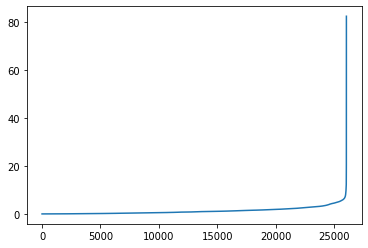

In [ ]:
# Visualize the points by distance sorted by the K-th neighbours.
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

Parameters set_0
* min_samples: 130
* eps:6.8

In [ ]:
# DBSCAN Clustering based on the parameters set above
db = DBSCAN(eps= 6.8, min_samples=130)
y_pred_0 = db.fit_predict(famdX)

In [ ]:
len(y_pred_0)

26048

In [ ]:
# Check the labels of cluster
print(set(y_pred_0))

{0, 1, -1}


### DBSCAN Result Visualization

2642

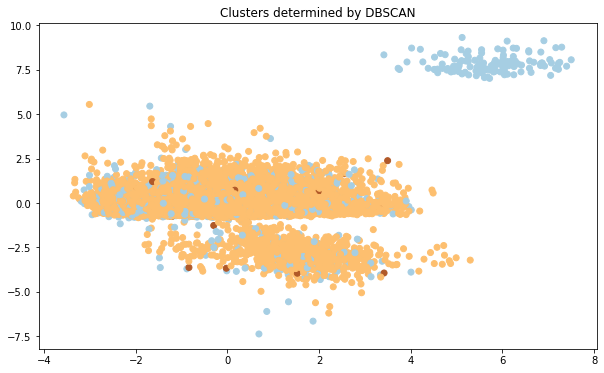

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(famdX.iloc[:,0], famdX.iloc[:,1],c=y_pred_0, cmap='Paired')
plt.title("Clusters determined by DBSCAN")
db.labels_[db.labels_ == -1].size

### Evaluation of the clustering method

Deicision of cluserting evaluation measures

* DBSCAN has their own way of measuring the performance of clustering, which is called DBCV. It is a better evaluation measure with the ability to handle the noise and non-globular shaped clusters. However, DBCV can only be accessed by code implementation from github and running it on our code did not end.

Therefore we used the same evaluation measures with the one for K-means clustering. However, it is likely to be biased to have higher values.


In [ ]:
# Calculating the intrinsic measures

print('Intrinsic measures')
labels = y_pred_0
Silhouette_Score=metrics.silhouette_score(famdX, labels, metric = 'euclidean')
print('Silhouette Score:',Silhouette_Score)

# Calinski_harabasz_score

CH_score = metrics.calinski_harabasz_score(famdX, labels)
print('Calinski Harabasz Score:',CH_score)
print('-----------------------------------------------')

#Calculating the extrinsic measures
print('Extrinsic measures')
H_Score=metrics.homogeneity_score(y_train, labels)
print('homogeneity_score:',H_Score)

v_measure_score=metrics.v_measure_score(y_train, labels)
print('v_measure_score:',v_measure_score)

Intrinsic measures
Silhouette Score: 0.2019493802324271
Calinski Harabasz Score: 183.24277459524927
-----------------------------------------------
Extrinsic measures
homogeneity_score: 2.299297083879762e-05
v_measure_score: 2.7832754085483524e-05


For the next task - Protected Attribute, we made another prediction result with different parameters

In [ ]:
# DBSCAN clustering with different parameter
db_1 = DBSCAN(eps= 6.5, min_samples=140)
y_pred_1 = db_1.fit_predict(famdX)

In [ ]:
print(set(y_pred_1))

{0, 1, 2, -1}


2642

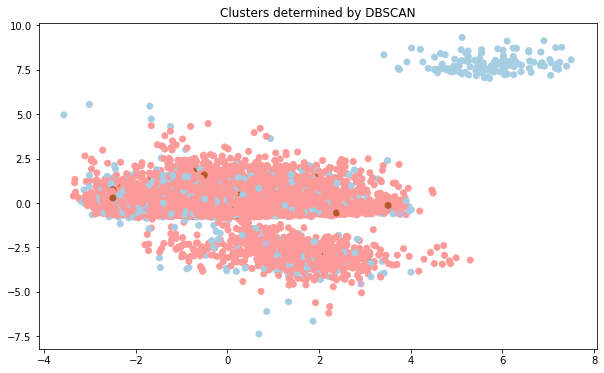

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(famdX.iloc[:,0], famdX.iloc[:,1],c=y_pred_1, cmap='Paired')
plt.title("Clusters determined by DBSCAN")
db.labels_[db.labels_ == -1].size

# Protected Attributes

Fairness in clustering is different from the one for classification as it focuses on the distribution of instances in a cluster which is supposed to be balanced even if they are divided by the protected attribute.

Therefore, we are going to see the distribution of instances in one cluster divided by protected attribute. The instances with the same cluster label are supposed to be fairly numbered when counting with and without protected attribute.

* Dataset: fair_data
* Protected attribute = ‘sex’ {‘ Female’, ‘ Male’}
* Cluster labels = y_hat

  Here, name of y_hat changes depending on the cluster model and the parameter settings.


###  Fairness - Awareness measures: Statistical Parity Difference

SPD = P(y_hat = + | S = not s) - P(y_hat = + | S = s)

y_hat will be described as variables:

y_pred_pos_l (left hand side), y_pred_pos_r (right hand side)



In [ ]:
def statParityDif(dataset, protect_att, class_att, c):

    #Conditional on 'sex'
    malerows = dataset.loc[dataset[protect_att] == " Male"]
    malerows_pos = malerows.loc[dataset[class_att] == c]
    y_pred_l = len(malerows_pos)

    femalerows = dataset.loc[dataset[protect_att] == " Female"]
    femalerows_pos = femalerows.loc[dataset[class_att] == c]
    y_pred_r = len(femalerows_pos)

    lhs = y_pred_l/len(dataset)
    rhs = y_pred_r/len(dataset)

    return (lhs-rhs)

### Fair range
To evaluate the fairness from each clustering model, we refer to the following paper for the fair range (https://arxiv.org/pdf/2110.13029.pdf).

If the measures fall into the range between -0.1 to 0.1, we can say that the model does not contain a bias towards the protected attribute S in our dataset. In other words, if the measures are below -0.1 or above 0.1, we can say that the model is biased regarding the attribute S.

### range: (-0.1, 0.1)


In [ ]:
# Unique values of clusters by different parameter setting
cluster_0 = set(y_pred_0)
cluster_1 = set(y_pred_1)

print(cluster_0)
print(cluster_1)

{0, 1, -1}
{0, 1, 2, -1}


In [ ]:
# Preprocessing for dataset
X_train.head()

,age,fnlwgt,capital-gain,capital loss,hours-per-week,education,workclass,marital-status,race,sex,native-country
12014,41,133692.0,0.0,0.0,40.0,Bachelors,Local-gov,Divorced,White,Female,United-States
12240,46,265554.0,0.0,0.0,40.0,HS-grad,State-gov,Never-married,Black,Male,United-States
17777,27,220748.0,0.0,0.0,48.0,HS-grad,Private,Never-married,Black,Male,United-States
12102,34,173524.0,0.0,0.0,40.0,HS-grad,Private,Separated,White,Female,United-States
13708,57,110417.0,0.0,0.0,75.0,Some-college,Self-emp-not-inc,Married-civ-spouse,White,Male,United-States


In [ ]:
# Add column of the result of DBSCAN clustering with different parameters 0, 1
fair_data = X_train.copy()
fair_data.insert(len(fair_data.columns), "dbscan_y_0", y_pred_0)
fair_data.insert(len(fair_data.columns), "dbscan_y_1", y_pred_1)

In [ ]:
# Dataset to use measuring fairness-awareness
fair_data.head()

,age,fnlwgt,capital-gain,capital loss,hours-per-week,education,workclass,marital-status,race,sex,native-country,dbscan_y_0,dbscan_y_1
12014,41,133692.0,0.0,0.0,40.0,Bachelors,Local-gov,Divorced,White,Female,United-States,0,0
12240,46,265554.0,0.0,0.0,40.0,HS-grad,State-gov,Never-married,Black,Male,United-States,0,0
17777,27,220748.0,0.0,0.0,48.0,HS-grad,Private,Never-married,Black,Male,United-States,0,0
12102,34,173524.0,0.0,0.0,40.0,HS-grad,Private,Separated,White,Female,United-States,0,0
13708,57,110417.0,0.0,0.0,75.0,Some-college,Self-emp-not-inc,Married-civ-spouse,White,Male,United-States,0,0


In [ ]:
# Fairness-Awareness measures results of DBSCAN clustering

# Statistical Parity Difference with the parameter_0
spd_0 = {}
for c in cluster_0:
  temp = statParityDif(fair_data, 'sex', 'dbscan_y_0', c)
  spd_0[c] = temp

# Statistical Parity Difference with the parameter_1
spd_1 = {}
for c in cluster_1:
  temp = statParityDif(fair_data, 'sex', 'dbscan_y_1', c)
  spd_1[c] = temp

# Comparison between SPD of parameter 0 and parameter 1
print("SPD of DBSCAN with param_0\n", spd_0)
print("\n")
print("SPD of DBSCAN with param_1\n", spd_1)



SPD of DBSCAN with param_0
 {0: 0.3075476044226045, 1: 0.0017275798525798526, -1: 0.03270884520884521}


SPD of DBSCAN with param_1
 {0: 0.30244164619164615, 1: 0.002879299754299754, 2: 0.0020347051597051596, -1: 0.034628378378378386}


In [ ]:
# Dataframe - SPD of DBSCAN with param_0
temp_0 =pd.DataFrame(spd_0, cluster_0).transpose()
temp_0.columns = ['spd_0', 'spd_1', 'spd_2']
dbscan_param_0 = temp_0.drop(['spd_1', 'spd_2'],axis = 1)
dbscan_param_0

,spd_0
0,0.303632
1,0.002035
-1,0.032402


In [ ]:
# Dataframe - SPD of DBSCAN with param_1
temp_1 =pd.DataFrame(spd_1, cluster_1).transpose()
temp_1.columns = ['spd_1', 'spd_11', 'spd_12','spd_13']
dbscan_param_1 = temp_1.drop(['spd_11', 'spd_12', 'spd_13'],axis = 1)
dbscan_param_1

,spd_1
0,0.298180
1,0.002879
2,0.002111
-1,0.034897


### Fairness of models
1. Between parameters
The results from the models show that when coordinating parameters, the number of clusters gets bigger and the overall SPD becomes smaller. However this fact does not prove that the model with more clusters would result in less bias. As the instances are more sparse in the model with greater number of clusters, the distributional difference between two clusters would be also small.  
2. Comparing two clustering methods
Also, comparing the SPD tables between two different clustering methods, there was no meaningful difference.

4 tables show that our dataset models cannot guarantee the fair clustering as at most 2 labels in one SPD model shows the value out of the fair range (-0.1, 0.1).
